# 6.4 Machine Learning Part 1

### The following script contains the following:

#### 1. Importing Libraries and Data set

#### 2. Data Cleaning

#### 3. Data Prep for Regression Analysis

#### 4. Regression Analysis

### 1. Import libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display the graphs/charts

%matplotlib inline

In [3]:
path = r'C:\Users\nehat\OneDrive\Desktop\CF DA Immersion\Achievement 6\Aviation Accidents In The US'

In [4]:
# Import Data set

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'geospatial.csv'))

### 2. Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Investigation.Type', 'Event.Date',
       'Country', 'Latitude', 'Longitude', 'Airport.Name', 'Aircraft.Damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.Phase.Of.Flight', 'City', 'State', 'InjurySeverityType',
       'Aircraft Size'],
      dtype='object')

In [6]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Investigation.Type,Event.Date,Country,Latitude,Longitude,Airport.Name,Aircraft.Damage,Aircraft.Category,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.Of.Flight,City,State,InjurySeverityType,Aircraft Size
0,0,0,Accident,2/16/2021,United States,42.595377,-89.030245,NaN,Substantial,Airplane,...,2.0,0.0,0.0,0.0,VMC,NaN,JANESVILLE,WI,Fatal,Medium Aircraft
1,1,1,Accident,2/15/2021,United States,18.354444,-65.027778,NaN,Destroyed,Helicopter,...,4.0,0.0,0.0,0.0,VMC,NaN,St Thomas,CB,Fatal,Small Aircraft
2,2,2,Accident,2/13/2021,United States,61.336392,-152.016430,NaN,Substantial,Airplane,...,0.0,0.0,2.0,0.0,NaN,NaN,TYONEK,AK,Minor,Small Aircraft
3,3,3,Accident,2/12/2021,United States,43.297731,-89.755693,SAUK-PRAIRIE,Substantial,Airplane,...,0.0,0.0,0.0,1.0,VMC,NaN,PRAIRIE DU SAC,WI,Non-Fatal,Small Aircraft
4,4,4,Accident,2/10/2021,United States,27.243723,-81.413767,NaN,Substantial,Airplane,...,0.0,0.0,1.0,0.0,NaN,NaN,LAKE PLACID,FL,Minor,Small Aircraft
5,5,5,Accident,2/8/2021,United States,42.100000,-107.580000,NaN,Substantial,Airplane,...,0.0,0.0,2.0,0.0,VMC,NaN,SARATOGA,WY,Minor,Small Aircraft
6,6,6,Accident,2/8/2021,United States,40.107220,-93.374640,NaN,Substantial,Airplane,...,2.0,0.0,0.0,0.0,IMC,NaN,GALT,MO,Fatal,Small Aircraft
7,7,7,Accident,2/8/2021,United States,38.247194,-78.045611,ORANGE COUNTY,Substantial,Airplane,...,0.0,0.0,0.0,1.0,VMC,NaN,ORANGE COUNTY,VA,Non-Fatal,Small Aircraft
8,8,8,Accident,2/8/2021,United States,33.461769,-111.730460,Falcon Field Airport,Substantial,Helicopter,...,0.0,0.0,0.0,2.0,VMC,NaN,MESA,AZ,Non-Fatal,Small Aircraft
9,9,9,Accident,2/8/2021,United States,39.613889,-110.751610,CARBON COUNTY RGNL/BUCK DAVIS,Substantial,Airplane,...,0.0,0.0,0.0,1.0,NaN,NaN,PRICE,UT,Non-Fatal,Small Aircraft


In [7]:
df.shape

(84794, 26)

In [8]:
# Drop columns

df.drop(columns = ["Unnamed: 0.1"], inplace = True)

In [9]:
df.dtypes

Unnamed: 0                  int64
Investigation.Type         object
Event.Date                 object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Name               object
Aircraft.Damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.Of.Flight      object
City                       object
State                      object
InjurySeverityType         object
Aircraft Size              object
dtype: object

In [10]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [11]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Country', 'Latitude', 'Longitude',
       'Airport.Name', 'Aircraft.Damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.Phase.Of.Flight', 'City', 'State', 'InjurySeverityType',
       'Aircraft Size'],
      dtype='object')

#### Check missing values

In [12]:
df.isnull().sum()

Investigation.Type           13
Event.Date                    0
Country                     504
Latitude                      0
Longitude                     0
Airport.Name              34010
Aircraft.Damage            2801
Aircraft.Category         56030
Make                         68
Model                        99
Amateur.Built               680
Number.of.Engines             0
Engine.Type                4611
Purpose.of.flight          5391
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3668
Broad.Phase.Of.Flight      7368
City                         77
State                       579
InjurySeverityType          134
Aircraft Size                 0
dtype: int64

In [13]:
# Fill missing values with Nan

categorical_columns = df.select_dtypes(include=['object']).columns

df[categorical_columns] = df[categorical_columns].fillna("NaN")

In [14]:
# check missing values have been replace

df.isnull().sum()

Investigation.Type        0
Event.Date                0
Country                   0
Latitude                  0
Longitude                 0
Airport.Name              0
Aircraft.Damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.Phase.Of.Flight     0
City                      0
State                     0
InjurySeverityType        0
Aircraft Size             0
dtype: int64

#### Check for Duplicates

In [15]:
dups = df.duplicated()

In [16]:
dups.shape

(84794,)

There are no duplicates in the data set

#### Check Extreme Values

C:\Users\nehat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number.of.Engines', ylabel='Density'>

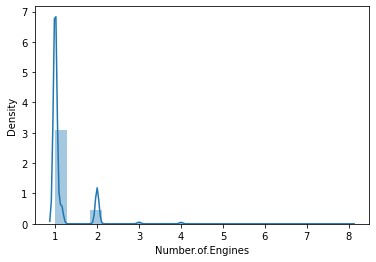

In [17]:
# check for extreme values

sns.distplot(df['Number.of.Engines'], bins=25)

In [18]:
# Check the mean

df['Number.of.Engines'].mean()

1.1635606831172267

In [19]:
# Check the median

df['Number.of.Engines'].median()

1.0

In [20]:
# Check the max

df['Number.of.Engines'].max()

8.0

C:\Users\nehat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total.Fatal.Injuries', ylabel='Density'>

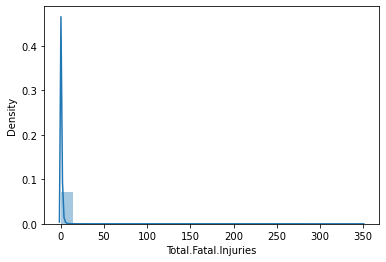

In [21]:
sns.distplot(df['Total.Fatal.Injuries'], bins=25)

In [22]:
# Check the mean

df['Total.Fatal.Injuries'].mean()

0.8493553456784716

In [23]:
# Check the median

df['Total.Fatal.Injuries'].median()

0.8470373809278173

In [24]:
# Check the max

df['Total.Fatal.Injuries'].max()

349.0

C:\Users\nehat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total.Serious.Injuries', ylabel='Density'>

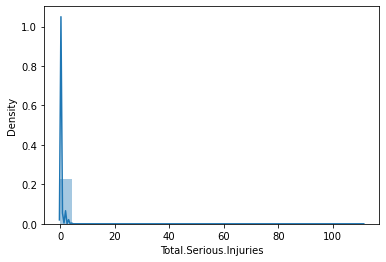

In [25]:
# check for extreme values

sns.distplot(df['Total.Serious.Injuries'], bins=25)

In [26]:
# Check the mean

df['Total.Serious.Injuries'].mean()

0.32860389997199524

In [27]:
# Check the median

df['Total.Serious.Injuries'].median()

0.0

In [28]:
# Check the max

df['Total.Serious.Injuries'].max()

111.0

C:\Users\nehat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total.Minor.Injuries', ylabel='Density'>

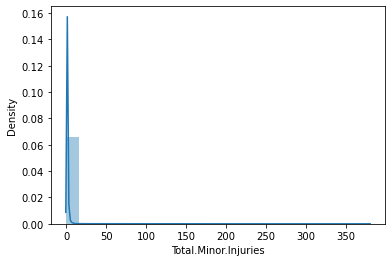

In [29]:
# check for extreme values

sns.distplot(df['Total.Minor.Injuries'], bins=25)

In [30]:
# Check the mean

df['Total.Minor.Injuries'].mean()

0.5204960168633428

In [31]:
# Check the median

df['Total.Minor.Injuries'].median()

0.5211041538054502

In [32]:
# Check the max

df['Total.Minor.Injuries'].max()

380.0

C:\Users\nehat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total.Uninjured', ylabel='Density'>

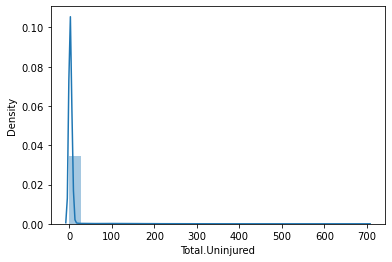

In [33]:
# check for extreme values

sns.distplot(df['Total.Uninjured'], bins=25)

In [34]:
# Check the mean

df['Total.Uninjured'].mean()

6.1655651498268185

In [35]:
# Check the median

df['Total.Uninjured'].median()

1.0

In [36]:
# Check the max

df['Total.Uninjured'].max()

699.0

### 3. Data Prep for Regression Analysis

#### Create different scatterplots using matplotlib for another look at how the chosen variables plot against each other.

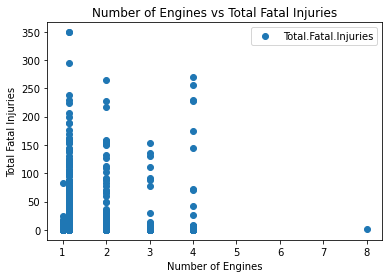

In [37]:
# Scatterplot for number of engines and total fatal injuries

scatter2 = df.plot(x = 'Number.of.Engines', y='Total.Fatal.Injuries',style='o')
plt.title('Number of Engines vs Total Fatal Injuries')  
plt.xlabel('Number of Engines')  
plt.ylabel('Total Fatal Injuries')  
plt.show()

In [38]:
# Export scatterplot

scatter2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'engines_fatal.png'))

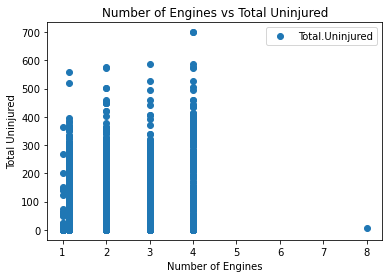

In [39]:
# Scatterplot for number of engines and total uninjured

scatter3 = df.plot(x = 'Number.of.Engines', y='Total.Uninjured',style='o')
plt.title('Number of Engines vs Total Uninjured')  
plt.xlabel('Number of Engines')  
plt.ylabel('Total Uninjured')  
plt.show()

In [40]:
# Export scatterplot

scatter3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'engines_uninjured.png'))

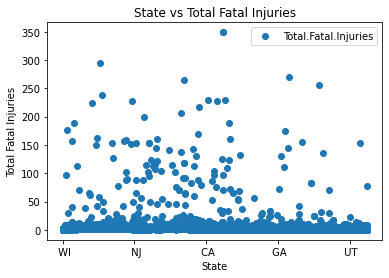

In [41]:
# Scatterplot for the total fatal injuries within each state

scatter4 = df.plot(x = 'State', y='Total.Fatal.Injuries',style='o')
plt.title('State vs Total Fatal Injuries')  
plt.xlabel('State')  
plt.ylabel('Total Fatal Injuries')  
plt.show()

In [42]:
# Export scatterplot

scatter4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'state_fatal.png'))

### 4. State hypothesis

#### Hypothesis

The fewer the engines, the higher the number of fatal injuries.

### 5. Reshape the Variables into NumPy arrays and put them in to separate objects

In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Total.Fatal.Injuries'].values.reshape(-1,1)
y = df['Number.of.Engines'].values.reshape(-1,1)

In [44]:
X

array([[2.],
       [4.],
       [0.],
       ...,
       [3.],
       [4.],
       [2.]])

In [45]:
y

array([[2.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

### 6. Split the data in to two sets: a training and a test set

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7. Regression Analysis


In [47]:
# Create a regression object to fit on the training set

regression = LinearRegression()

In [48]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

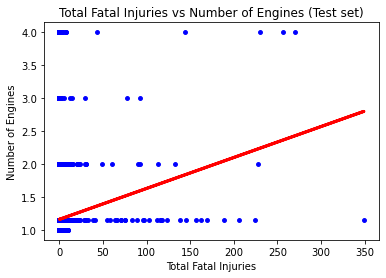

In [50]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
scatter5 = plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Fatal Injuries vs Number of Engines (Test set)')
plot_test.xlabel('Total Fatal Injuries')
plot_test.ylabel('Number of Engines')
plot_test.show()

In [51]:
# Export scatterplot

scatter5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line.png'))

Around the regression line there are many data points that are not been covered. There appears to be a positive slope indicating the hypothesis of fewer engines leads to less fatal injuries. There are some data pointd suggestng that higher fatal injuries also with aircrafts with engines 2 and below.

In [52]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [53]:
# Print the model summary statistics to evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00469473]]
Mean squared error:  0.17063534064598865
R2 score:  0.005020333801022625


From the above results we can see there is a positive relationship with a positve coefficient. So as the number of total fatal injuries increase so does the number of engines. This is different from my hypothesis as I assumed from my previous analysis that as the number of engines increase the number of total fatal injuries decreased. 
Looking at the MSE the regression may not be the best model to predict the relationship between the two chosen variables.
The R2 score is very small which also suggests that the model is not a great fit or performing well.

In [54]:
y_predicted

array([[1.16982679],
       [1.16441394],
       [1.16513205],
       ...,
       [1.16043732],
       [1.16513205],
       [1.16441394]])

In [55]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.000000,1.169827
1,1.000000,1.164414
2,2.000000,1.165132
3,1.000000,1.164414
4,1.000000,1.160437
5,1.000000,1.160437
6,1.000000,1.160437
7,1.000000,1.169827
8,1.000000,1.160437
9,1.000000,1.160437


From what I can see there is some difference between the actual and predicted y values. This also suggests that the model doesn't justify the relationship between the "Number of Engines" and "Total Fatal Injuries". The variance in the data can not explain the linear relationship between the variables. Therefore my current hypothesis may not be valid. 

There may be some data bias involved with this data set, whether it is related to lack of incomplete data, the person collecting the bias and interpreting the data/results or from those providing the results. This wpuld have an impact on the overall results of the hypothesis sought and also affect other variables if they were to be measured against each other.

In [56]:
# Export file to csv

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'regression_analysis.csv'))